### Wybrany algorytm data mining - KNN

In [60]:
# Niezbędne biblioteki
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### 1. Przygotowanie danych i wybór zmiennych

In [61]:
df = pd.read_csv('data/bmd_prep.csv')

all_num_predictors = df.select_dtypes(include=np.number).columns.tolist()
# normalization of numeric variables
df[all_num_predictors] = MinMaxScaler().fit_transform(df[all_num_predictors])

target_var = 'bmd'
num_predictors = ['age', 'weight_kg', 'waiting_time']
cat_predictors =  ['sex']

X = df[num_predictors + cat_predictors]
y = df[target_var]

# one-hot encode categorical variables
X = pd.get_dummies(X)

# Split data to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.head()

,age,weight_kg,waiting_time,sex_F,sex_M
16,0.417844,0.516667,0.000000,0,1
66,0.925077,0.533333,0.065934,0,1
136,0.608308,0.366667,0.032967,1,0
40,0.706773,0.266667,0.923077,1,0
160,0.923837,0.266667,0.296703,0,1


#### 2. Optymalizacja wartości k - V-krotny sprawdzian krzyżowy

In [62]:
# Sets up the kNN regressor object
knn = KNeighborsRegressor() 

# Search parameters
param = range(3, 15, 2)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(
    knn,
    {'n_neighbors': param})

# Fits the grid object and gets the best model
best_knn = grid \
    .fit(X, y) \
    .best_estimator_

# Displays the optimum model
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

##### Wykres wyniku sprawdzianu krzyżowego w zależności od ilości sąsiadów

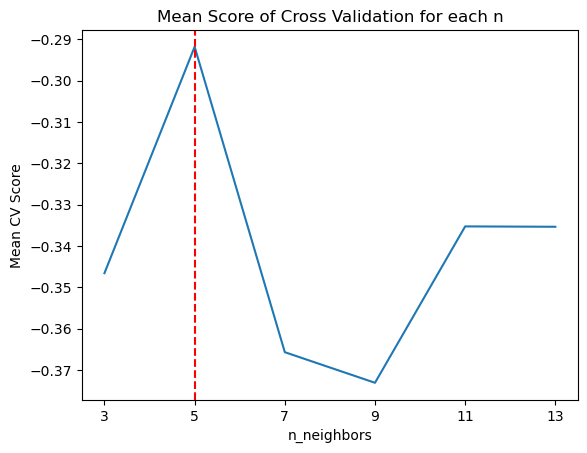

In [67]:
# Plots mean_test_scores vs. total neighbors
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Adds labels to the plot
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')
plt.title('Mean Score of Cross Validation for each n')

# Draws a vertical line where the best model is
plt.axvline(
    x=best_knn.n_neighbors, 
    color='red', 
    ls='--')

Przeprowadzony sprawdzian krzyżowy wykazał, że najbardziej optymalną ilością sąsiadów jest `5`

#### 3. Algorytm KNN dla optymalnych parametrów

In [64]:
params = best_knn.get_params()
knn = KNeighborsRegressor(**params) 
knn.fit(X, y)

KNeighborsRegressor()

#### Dokładność otrzymanego modelu

In [65]:
print(
    'Accuracy on training data: ' 
    + str("{:.2%}".format(knn.score(X_train, y_train))))
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(knn.score(X_test, y_test))))

Accuracy on training data: 57.72%
Accuracy on testing data: 55.54%


#### 4. Interpretacja wyników

Otrzymana dokładność modelu nie jest ogólnie zadowalająca. Biorąc pod uwagę, że rozkład punktów w zbiorze danych stanowi tak naprawdę jedną wielką chmurę punktów (co jest widoczne na wykresach rozrzutu), KNN wbrew pozorom poradził sobie nienajgorzej. Na podstawie wybranych zmiennych objaśniających, model jest w stanie poprawnie przewidzieć wartość wskaźnika `bmd` z dokładnością nieco ponad `50%`.